<a href="https://colab.research.google.com/github/doryunnim/machinelearning/blob/ready/raedy_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
print(np.__version__)

my_arr = np.array([[10, 20, 30], [40, 50, 60]])
print(my_arr)
print(type(my_arr))
print(my_arr[0][2])
print(np.sum(my_arr))
# 마지막 줄은 print() 함수를 사용하지 않아도 자동으로 결과가 출력된다.

1.17.5
[[10 20 30]
 [40 50 60]]
<class 'numpy.ndarray'>
30
210


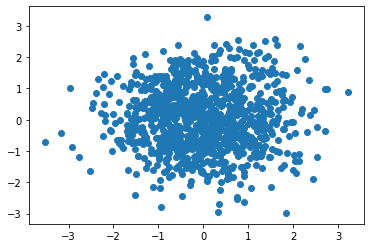

In [22]:
import matplotlib.pyplot as plt

# plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16 ,25])
# plt.show()

# plt.scatter([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
# plt.show()

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()

선형 회귀는 머신러닝 알고리즘 중 하나입니다.


(442, 10) (442,)
1.0616962065186886
151.0
1.0678658271705574
0.061696206518688734
1.0616962065186888
1.1616962065186887
1.0
2.0
10.250624555904514 150.9383037934813
14.132317616381767 75.52764127612664
587.8654539985689 99.40935564531424


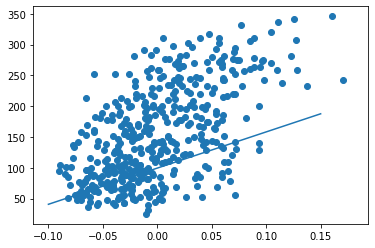

In [33]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)
# print(diabetes.data[0:3])

# plt.scatter(diabetes.data[:, 2], diabetes.target)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

x = diabetes.data[:, 2]
y = diabetes.target

w = 1.0
b = 1.0
y_hat = x[0] * w + b
print(y_hat)
print(y[0])
# w에 대한 변화율로 절편 업데이트 하기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

w_new = w + w_rate
print(w_new)
# b에 대한 변화율로 절편 업데이트 하기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

b_new = b + 1
print(b_new)

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1] ] )
plt.show()
